<a href="https://colab.research.google.com/github/younghoonNa/PythonDT2/blob/main/Day4_notepad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(0)
y = np.random.randint(0, 2, 20)
y_pred = y.copy()
y_pred[::2] = 0
print(y)
print(y_pred)

[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1]
[0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1]


In [ ]:
from sklearn.metrics import confusion_matrix

# tn fp
# fn tp
confusion_matrix(y, y_pred)

array([[9, 0],
       [5, 6]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

In [ ]:
# accuracy
# (tp+tn) / (tp+tn+fp+fn)
from sklearn.metrics import accuracy_score

accuracy_score(y, y_pred)

0.75

In [ ]:
# Recall or Sensitivity or True Positive Rate (TPR)
# tp/(tp+fn)
# tp+fn = 전체 Positive 수
from sklearn.metrics import recall_score

recall_score(y, y_pred)

0.5454545454545454

In [ ]:
# Specificity or True Negative Rate (TNR)
# tn/(tn+fp)
# tn+fp = 전체 Negative 수
from sklearn.metrics import confusion_matrix

def specificity_score(y, pred):
  tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
  return tn/(tn+fp)

specificity_score(y, y_pred)

1.0

In [ ]:
# Precision or Positive Predictive Value (PPV)
# tp/(tp+fp)
# tp+fp = Positive로 예측한 데이터 수
from sklearn.metrics import precision_score

precision_score(y, y_pred)

1.0

In [ ]:
# Negative Predictive Value (NPV)
# tn/(tn+fn)
# tn+fn = Negative로 예측한 데이터 수
from sklearn.metrics import confusion_matrix

def npv_score(y, pred):
  tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
  return tn/(tn+fn)

npv_score(y, y_pred)

0.6428571428571429

In [ ]:
# f1 score
# 2/(1/recall + 1/precision)
# recall과 precision의 조화 평균
# 데이터 클래스 비율이 다를 경우 정확도 대신 사용할 수 있음
from sklearn.metrics import f1_score

f1_score(y, y_pred)

0.7058823529411764

In [ ]:
# f beta score
# 다른 가중치를 갖는 recall과 precision의 조화 평균
from sklearn.metrics import fbeta_score

# beta == 1 f1
# beta > 1 recall 우선
# beta < 0 precision 우선
print(fbeta_score(y, y_pred, beta=2))
print(fbeta_score(y, y_pred, beta=0.5))

0.6
0.8571428571428571


[0. 0. 1.]
[0.         0.54545455 1.        ]
[2 1 0]


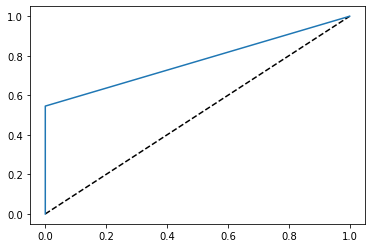

In [ ]:
# Receiver operating characteristic (ROC)
# 서로 다른 threshold에 대한 FPR과 TPR의 관계 커브
# False Positive Rate (FPR)
# 실제는 Negative인 클래스를 Positive로 잘못 예측한 비율
# fp/(fp+tn)
# fp+tn = 전체 Negative
from sklearn.metrics import roc_curve

fpr, tpr, thresh = roc_curve(y, y_pred)

print(fpr)
print(tpr)
print(thresh)

plt.plot([0, 1], [0,1], 'k--')
plt.plot(fpr, tpr)

In [ ]:
# Area Under the Curve (AUC)
from sklearn.metrics import auc

auc(fpr,tpr)

0.7727272727272727

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, y_pred)

0.7727272727272727